In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import nltk
import re

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('instagram_reach.csv')
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [4]:
df[df.USERNAME.duplicated(keep=False)]

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
23,23,27,mikequindazzi,8.5 billion more #smartphones by 2021 will hel...,4496,#DeepLearning #MachineLearning#ArtificialIntel...,2 hours,11
28,1,7,philosophercoin,Check my profile to find out about more fundam...,279,#Bitcoin #Cryptocurrency#Ethereum #stockmarket...,4 hours,43
29,2,9,philosophercoin,Isn't it funny to think that Bitcoin uses Arti...,279,#Bitcoin #Cryptocurrency#Ethereum #stockmarket...,2 hours,37
39,0,5,mikequindazzi,1 in 3 #Smartphones will ship w/ #MachineLearn...,1600,#MachineLearning #artificialintelligence#AI #IoT,14 hours,136
52,13,21,opensourcedworkplace,NaN,348,#HR #workplace#officedesign #iot #bigdata #off...,4 hours,17
59,20,28,mikequindazzi,8.5 billion more #smartphones by 2021 will hel...,4496,#DeepLearning #MachineLearning#ArtificialIntel...,2 hours,11


#### data contain very few duplicate usernames, even there are two account named mikequindazzi but have different followers, this 
#### could be because of the data is collected over a long peroid of time and popularity of mikequindazzi has decreased

In [5]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

#### handle null values

In [6]:
df.Caption.replace(np.nan,' ',inplace=True)

<AxesSubplot: xlabel='Followers', ylabel='Density'>

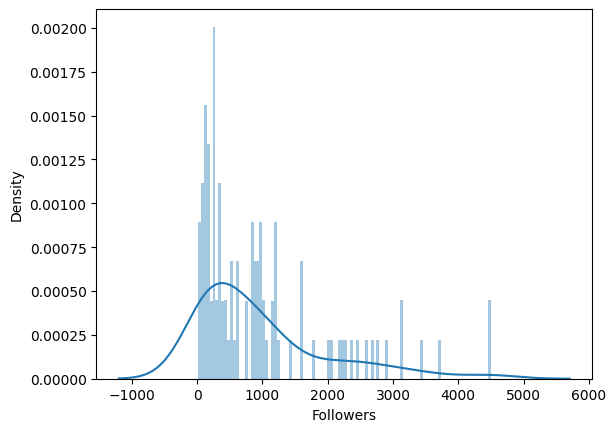

In [7]:
sns.distplot(df.Followers,bins=100)

most of the followers fall under 0 to 1000 interval

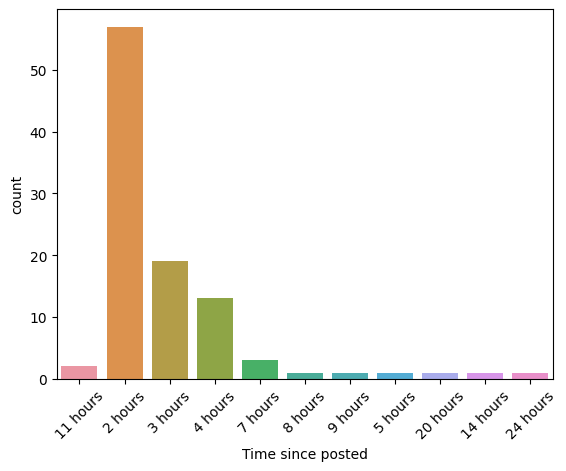

In [8]:
sns.countplot(df['Time since posted'])
plt.xticks(rotation=45)
plt.show()

In [9]:
df[df['S.No'].duplicated(keep=False)]

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
5,5,6,be.masterly,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,3 hours,18
6,6,7,lenovoworkstations,Check it out – we’re walking across the 🌎’s fi...,259,.#Tech #virtualreality #IoT #Machinelearning,3 hours,35
7,7,8,kirellb,Here's a network I made that depicts the scien...,1433,#datascientist #creativetechnology#design #art...,4 hours,86
8,8,9,ethicsandai,Having a great week at @ldntechweek exploring ...,13,#LTW #London #TechXLR8 #Technology#AI #Artific...,4 hours,22
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


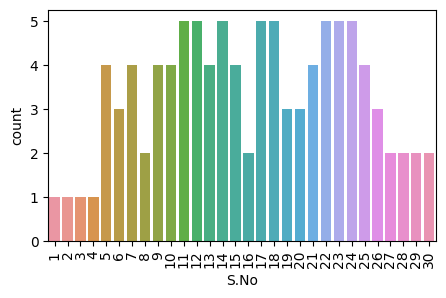

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(df['S.No'])
plt.xticks(rotation=90)
plt.show()

In [11]:
df[df['Unnamed: 0'].duplicated(keep=False)]

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


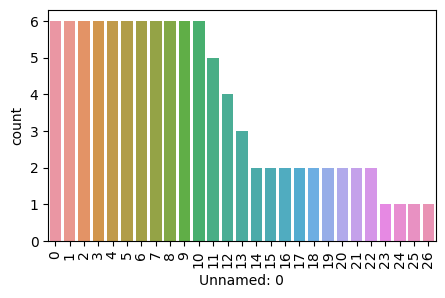

In [12]:
plt.figure(figsize=(5,3))
sns.countplot(df['Unnamed: 0'])
plt.xticks(rotation=90)
plt.show()

In [13]:
df[df['Unnamed: 0']==11]

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
11,11,13,edwisor_india,The IT industry is rapidly booming. Is your ca...,2232,#WedenesdayWisdom #IndustryInsights#GetSkilled...,8 hours,48
38,11,23,litebit.eu,"As a safety measure for your account, we ask y...",193,#bitcoin #litecoin #blockchain#cryptocurrency ...,2 hours,18
50,11,19,triatebr,Imagine having access to the data of the air w...,1766,#blockchain #tech #startups #projetos#linux #e...,4 hours,25
84,11,22,pazrahn,The Peter McKinnon - Created this ridiculous m...,361,#pmbrollchallenge #Canon#Atomos #Panasonic #Mo...,3 hours,33
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [14]:
df[df['S.No']==11]

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
10,10,11,databowl,Today we are featured in The Future CMO Magazi...,149,#artificialintelligence #futurism#machinelearn...,7 hours,31
30,3,11,greenhousegroup,"Onze Angela en Niek hosten vandaag NextM, hét ...",828,#nextmnl#groupm #greenhousegroup #eindhoven#ef...,2 hours,90
42,3,11,hollympeck,Still on set. 🙃 Can't tell you what it's for!,273,#artificialintelligence,2 hours,41
63,1,11,interplayofficial,"On the auspicious occasion of Eid, Interplay w...",66,#Interplay #EidMubarak #EidulFitr #Eid#Eidbles...,3 hours,16
79,6,11,anandvanjape,,460,#Designer #style #artist#brand #logo #monogram...,2 hours,29


unnamed column and sr.no does not appear to have similarity

In [15]:
df.groupby(['S.No','Unnamed: 0']).mean()

Followers  Likes
S.No Unnamed: 0                    
1    0           1600.000000  139.0
2    1            880.000000   23.0
3    2            255.000000   25.0
4    3            340.000000   49.0
5    0           1863.333333   98.0
...                      ...    ...
28   24           166.000000   10.0
29   21           145.000000   16.0
     25          1211.000000   46.0
30   22            11.000000   10.0
     26           265.000000   25.0

[90 rows x 2 columns]

<AxesSubplot: xlabel='S.No', ylabel='Unnamed: 0'>

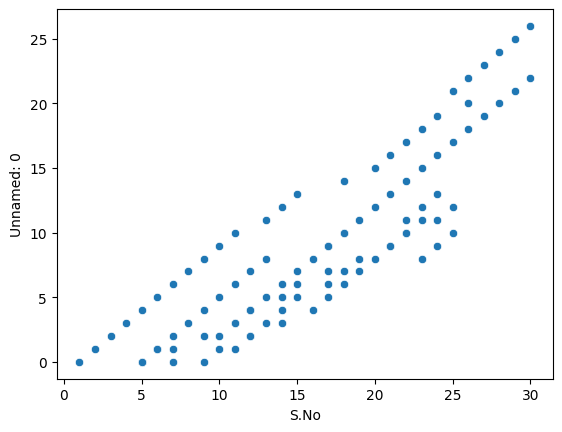

In [16]:
sns.scatterplot(df['S.No'],df['Unnamed: 0'])

<AxesSubplot: xlabel='Likes', ylabel='Followers'>

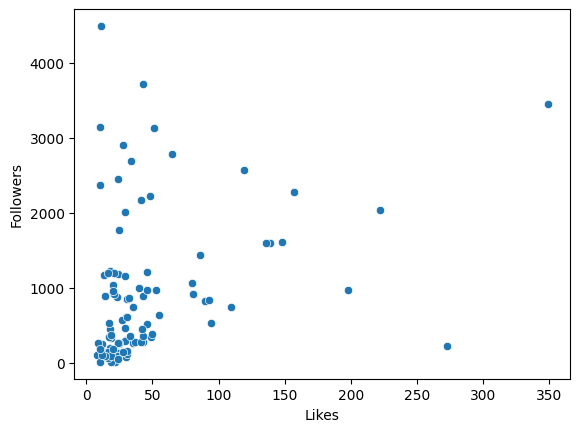

In [17]:
sns.scatterplot(df['Likes'],df['Followers'])

## feature extraction

In [18]:
captions = ".".join(df.Caption)
print(captions)

Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s.We all know where it’s going. We just have to #workresponsibly to postpone the date. This actually made into a business slide #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing.Alexander Barinov: 4 years as CFO in multinationals, over 10 years of experience as financial advisory in Deloitte & EY, 6 of them as a partner. Focused on strategic management, finance, legal, and compliance. Worked for the global corporations including publicly traded companies. 5 years experience in trading at NYSE and LSE exchanges. #whoiswho #aitrading #ai #aitradingteam#instateam #insta

In [19]:
print(df.Caption[1])

We all know where it’s going. We just have to #workresponsibly to postpone the date. This actually made into a business slide #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing


In [20]:
pattern = '#\w+'
# x=re.search(pattern,captions)
# print(x)
tags1=re.findall(pattern,captions)

In [21]:
hashtags = ".".join(df.Hashtags)
# print(hashtags)

# print(df.Hashtags[1])

pattern = '#\w+'
tags2=re.findall(pattern,hashtags)

In [22]:
len(tags2)

1906

In [23]:
freq=nltk.FreqDist(tags1+tags2)

In [24]:
print(freq)

<FreqDist with 1262 samples and 2053 outcomes>


In [25]:
most_freq=freq.most_common(50)
print(most_freq)

[('#artificialintelligence', 33), ('#machinelearning', 28), ('#AI', 22), ('#blockchain', 20), ('#MachineLearning', 18), ('#startup', 18), ('#ai', 16), ('#datascience', 16), ('#technology', 15), ('#tech', 15), ('#development', 14), ('#product', 14), ('#bigdata', 13), ('#IoT', 13), ('#BigData', 10), ('#business', 10), ('#crypto', 9), ('#ArtificialIntelligence', 9), ('#entrepreneurship', 8), ('#design', 8), ('#data', 8), ('#cryptocurrency', 7), ('#marketing', 7), ('#DeepLearning', 7), ('#ethereum', 7), ('#entrepreneur', 7), ('#programming', 7), ('#motivation', 7), ('#computerscience', 6), ('#robots', 6), ('#deeplearning', 6), ('#coding', 6), ('#code', 6), ('#startuplife', 6), ('#forex', 5), ('#analytics', 5), ('#work', 5), ('#developer', 5), ('#software', 5), ('#innovation', 5), ('#coder', 5), ('#digitalmarketing', 5), ('#hustle', 5), ('#litecoin', 5), ('#entrepreneurs', 5), ('#success', 5), ('#businessman', 5), ('#robot', 4), ('#illustration', 4), ('#coins', 4)]


In [26]:
word_features=[k for k,v in most_freq]

In [27]:
word_features

['#artificialintelligence',
 '#machinelearning',
 '#AI',
 '#blockchain',
 '#MachineLearning',
 '#startup',
 '#ai',
 '#datascience',
 '#technology',
 '#tech',
 '#development',
 '#product',
 '#bigdata',
 '#IoT',
 '#BigData',
 '#business',
 '#crypto',
 '#ArtificialIntelligence',
 '#entrepreneurship',
 '#design',
 '#data',
 '#cryptocurrency',
 '#marketing',
 '#DeepLearning',
 '#ethereum',
 '#entrepreneur',
 '#programming',
 '#motivation',
 '#computerscience',
 '#robots',
 '#deeplearning',
 '#coding',
 '#code',
 '#startuplife',
 '#forex',
 '#analytics',
 '#work',
 '#developer',
 '#software',
 '#innovation',
 '#coder',
 '#digitalmarketing',
 '#hustle',
 '#litecoin',
 '#entrepreneurs',
 '#success',
 '#businessman',
 '#robot',
 '#illustration',
 '#coins']

In [28]:
def find_features(document):
    words=set(document)
    features={}
    for w in word_features:
        if w in words:
            features[w]= 1
        else:
            features[w]= 0
    return features

In [29]:
df['combin']=df.Hashtags+df.Caption
print([df.Hashtags+df.Caption][0][0])

#MachineLearning #AI #DataAnalytics #DataScienc #DataLakeWho are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s


In [30]:
time=[int(i[:-5]) for i in df['Time since posted']]

In [31]:
df['time']=time
df.head(5)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,combin,time
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139,#MachineLearning #AI #DataAnalytics #DataScien...,11
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23,#deck .#mac #macintosh#sayhello #apple #steve...,2
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25,#whoiswho #aitrading #ai #aitradingteam#instat...,2
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49,#iot #cre#workplace #CDO #bigdata #technology#...,3
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30,#instamachinelearning #instabigdata#instamarke...,3


In [32]:
featuresets=[find_features(i.split()) for i in df.combin.replace('#',' #')]

In [33]:
features=pd.DataFrame(featuresets)
features

,#artificialintelligence,#machinelearning,#AI,#blockchain,#MachineLearning,#startup,#ai,#datascience,#technology,#tech,...,#coder,#digitalmarketing,#hustle,#litecoin,#entrepreneurs,#success,#businessman,#robot,#illustration,#coins
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes', 'combin', 'time'],
      dtype='object')

In [83]:
df1=pd.concat([features,df[['Unnamed: 0', 'S.No', 'Followers', 'time','Likes']]],axis=1)

In [84]:
df1

,#artificialintelligence,#machinelearning,#AI,#blockchain,#MachineLearning,#startup,#ai,#datascience,#technology,#tech,...,#success,#businessman,#robot,#illustration,#coins,Unnamed: 0,S.No,Followers,time,Likes
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1600,11,139
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,2,880,2,23
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,1,2,3,255,2,25
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,4,340,3,49
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,5,304,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8,19,614,3,31
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,21,450,3,42
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10,22,182,3,10
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,11,24,2039,3,222


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,HistGradientBoostingRegressor
import xgboost

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [115]:
df1['S.No']=df1['S.No']/3
df1['Unnamed: 0']=df1['Unnamed: 0']/2.6 
df1['Followers']=df1['Followers']/449.6

In [116]:
# X = df1.drop(['time','Likes'],axis=1)
X = df1.drop(['Likes'],axis=1)
y = df1.Likes

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [118]:
X_test

,#artificialintelligence,#machinelearning,#AI,#blockchain,#MachineLearning,#startup,#ai,#datascience,#technology,#tech,...,#entrepreneurs,#success,#businessman,#robot,#illustration,#coins,Unnamed: 0,S.No,Followers,time
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.307692,5.666667,0.398132,2
67,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1.923077,5.666667,4.837633,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.307692,2.333333,0.576068,3
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.769231,4.000000,0.197954,2
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.461538,7.000000,1.000890,3
83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.846154,6.000000,0.202402,3
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4.230769,8.000000,4.535142,3
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.153846,3.666667,0.607206,2
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9.615385,9.666667,2.693505,2
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5.769231,6.666667,2.159698,3


In [119]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_pred_linear = linear_model.predict(X_test)

In [120]:
print(f'mean_absolute_error {mean_absolute_error(y_pred_linear,y_test)},  mean_squared_error {mean_squared_error(y_pred_linear,y_test)},r2_score {r2_score(y_pred_linear,y_test)}')

mean_absolute_error 79.02909119135833,  mean_squared_error 15291.712236162377,r2_score -0.6712876504322227


In [121]:
y_pred_lineart = linear_model.predict(X_train)
print(f'mean_absolute_error {mean_absolute_error(y_pred_lineart,y_train)},  mean_squared_error {mean_squared_error(y_pred_lineart,y_train)},r2_score {r2_score(y_pred_lineart,y_train)}')

mean_absolute_error 11.286180604714417,  mean_squared_error 365.9102966732824,r2_score 0.8329355294513412


<AxesSubplot: ylabel='Likes'>

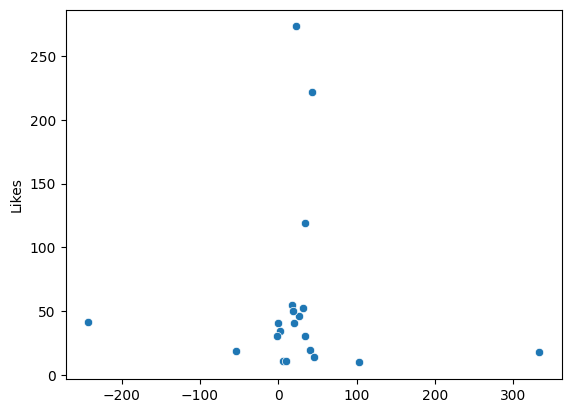

In [122]:
sns.scatterplot(y_pred_linear,y_test)

<AxesSubplot: ylabel='Likes'>

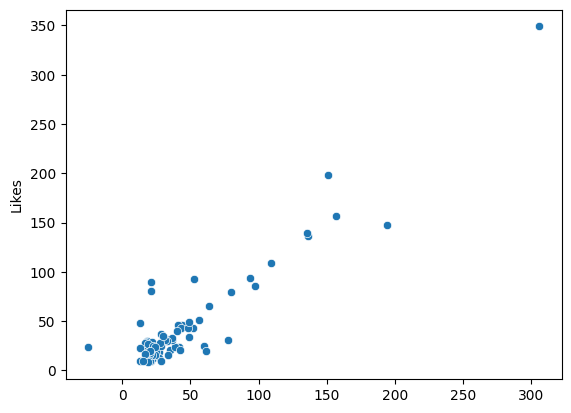

In [123]:
sns.scatterplot(y_pred_lineart,y_train)

In [124]:
RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred_rf =rf_model.predict(X_test)
print(f'mean_absolute_error {mean_absolute_error(y_pred_rf,y_test)},  mean_squared_error {mean_squared_error(y_pred_rf,y_test)},r2_score {r2_score(y_pred_rf,y_test)}')
y_pred_rft = rf_model.predict(X_train)
print(f'mean_absolute_error {mean_absolute_error(y_pred_rft,y_train)},  mean_squared_error {mean_squared_error(y_pred_rft,y_train)},r2_score {r2_score(y_pred_rft,y_train)}')

mean_absolute_error 43.553,  mean_squared_error 6016.83288,r2_score -22.945931490152212
mean_absolute_error 9.022625000000001,  mean_squared_error 311.0457962500001,r2_score 0.7825752635025838


In [125]:
gb_model=GradientBoostingRegressor()
gb_model.fit(X_train,y_train)
y_pred_gb =gb_model.predict(X_test)
print(f'mean_absolute_error {mean_absolute_error(y_pred_gb,y_test)},  mean_squared_error {mean_squared_error(y_pred_gb,y_test)},r2_score {r2_score(y_pred_gb,y_test)}')
y_pred_gbt = gb_model.predict(X_train)
print(f'mean_absolute_error {mean_absolute_error(y_pred_gbt,y_train)},  mean_squared_error {mean_squared_error(y_pred_gbt,y_train)},r2_score {r2_score(y_pred_gbt,y_train)}')

mean_absolute_error 41.84924342360871,  mean_squared_error 6048.040459965093,r2_score -20.901655244838814
mean_absolute_error 4.160722109980291,  mean_squared_error 35.061194634033015,r2_score 0.9851475683890194


In [126]:
xg_model=xgboost.XGBRegressor()
xg_model.fit(X_train,y_train)
y_pred_xg =xg_model.predict(X_test)
print(f'mean_absolute_error {mean_absolute_error(y_pred_xg,y_test)},  mean_squared_error {mean_squared_error(y_pred_xg,y_test)},r2_score {r2_score(y_pred_xg,y_test)}')
y_pred_xgt = gb_model.predict(X_train)
print(f'mean_absolute_error {mean_absolute_error(y_pred_xgt,y_train)},  mean_squared_error {mean_squared_error(y_pred_xgt,y_train)},r2_score {r2_score(y_pred_xgt,y_train)}')

mean_absolute_error 41.67900586128235,  mean_squared_error 5951.20279358508,r2_score -17.53006992439974
mean_absolute_error 4.160722109980291,  mean_squared_error 35.061194634033015,r2_score 0.9851475683890194


<AxesSubplot: ylabel='Likes'>

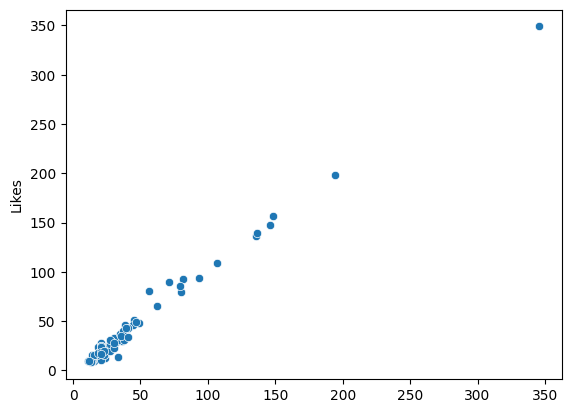

In [112]:
sns.scatterplot(y_pred_xgt,y_train)

<AxesSubplot: ylabel='Likes'>

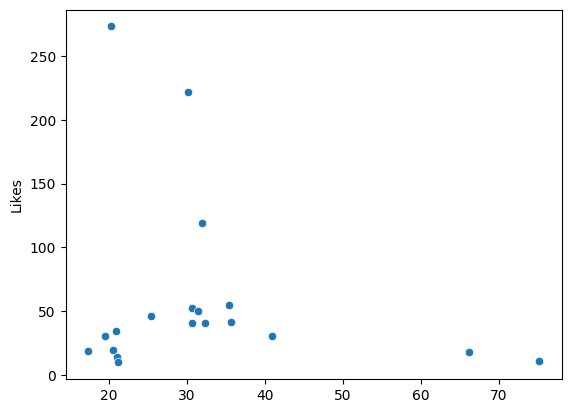

In [114]:
sns.scatterplot(y_pred_xg,y_test)